In [1]:
import pandas as pd
import numpy as np

In [2]:
def sigmoid(Z):
    
    sig= 1 / ( 1 + np.exp(-Z))
    
    return sig , Z

In [3]:
def relu(Z):
    
    A = np.maximum(0,Z)
    
    return A, Z


In [4]:
def initialize_parameters(layer_dims):
    
    parameters={}
    
    np.random.seed(1)
    
    for l in range(1,len(layer_dims)):
        parameters["W"+str(l)]= np.random.randn(layer_dims[l],layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters["b"+str(l)]= np.zeros((layer_dims[l],1))
        
    return parameters

In [5]:
def linear_forward(A,W,b):
    
    Z=np.dot(W , A)+ b
    
    cache= (A,W,b)
    
    return Z, cache

In [6]:
def linear_act_forward(A_prev, W, b, act_function="sigmoid"):
    
    if act_function=="sigmoid":
        Z , linear_cache = linear_forward(A_prev,W,b)
        A , activation_cache = sigmoid(Z)
        
    elif act_function=="relu":
        Z , linear_cache= linear_forward(A_prev,W,b)
        A , activation_cache = relu(Z)
        
    cache = (linear_cache,activation_cache)
    
    return A , cache
    

In [7]:
def linear_model(X, parameters):
    
    caches=[]
    
    A = X
    L = len(parameters) // 2
    
    for l in range(1,L):
        A_prev=A
        W = parameters["W"+str(l)]
        b= parameters ["b"+str(l)]
        A , cache = linear_act_forward(A_prev,W,b, act_function="relu")
        caches.append(cache)
    
    W=parameters["W"+str(L)]
    b=parameters["b"+str(L)]
    AL , cache = linear_act_forward(A,W,b,act_function="sigmoid")
    caches.append(cache)
    
    return AL, caches
    

In [8]:
def compute_cost(AL, Y):
    
    m=Y.shape[1]
    
    cost=-np.sum((Y*np.log(AL)+(1-Y)*np.log(1-AL))) / m 
    
    cost = np.squeeze(cost)
    
    return cost

In [9]:
def linear_backward(dZ, cache):
    
    m=dZ.shape[1]
    
    A_prev=cache[0]
    W=cache[1]
    
    dW = np.dot(dZ,A_prev.T)*(1/m)
    db = np.sum(dZ,axis=1,keepdims=True) * (1/m)
    dA_prev = np.dot(W.T,dZ)
    
    return dW, db, dA_prev

In [10]:
def sigmoid_backward(dA, cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    return dZ

In [11]:
def relu_backward(dA, cache):

    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    
    return dZ
    

In [12]:
def linear_act_backward(dA, cache, act_function="sigmoid"):
    
    linear_cache,activation_cache = cache
    
    if act_function=="sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dW, db, dA_prev = linear_backward(dZ, linear_cache)
        
    elif act_function=="relu":
        dZ = relu_backward(dA, activation_cache)
        dW, db, dA_prev = linear_backward(dZ, linear_cache)
        
    return dW, db, dA_prev

In [13]:
def backward_model(AL,Y,caches):
    
    grads=dict()
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) 
    
    L = len(caches)
    
    grads["dW"+str(L)],grads["db"+str(L)],grads["dA"+str(L-1)]=linear_act_backward(dAL,caches[L-1],act_function="sigmoid")
    
    for l in reversed(range(1,L)):
        current_cache=caches[l-1]
        dW_temp,db_temp,dA_temp=linear_act_backward(grads["dA"+str(l)],current_cache,act_function="relu")
        grads["dW"+str(l)]=dW_temp
        grads["db"+str(l)]=db_temp
        grads["dA"+str(l-1)]=dA_temp
    
    return grads
    

In [14]:
def update_parameters(parameters,grads,learning_rate):
    
    L=len(parameters)//2
    
    for l in range(L):
        parameters["W"+str(l+1)]=parameters["W"+str(l+1)] - learning_rate * (grads["dW"+str(l+1)])
        parameters["b"+str(l+1)]=parameters["b"+str(l+1)] - learning_rate * (grads["db" + str(l+1)])
        
    return parameters

In [15]:
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [16]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [17]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


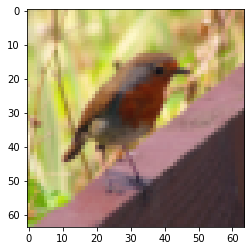

In [18]:
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [19]:
layers_dims = [12288, 20, 7, 5, 1] 

In [20]:
def dnn_model(X, Y, layer_dims, learning_rate=0.0075, iteration=2500,print_cost=False):
    
    costs=[]
    
    parameters = initialize_parameters(layer_dims)
    
    for i in range(0,iteration):
        
        AL, caches = linear_model(X,parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = backward_model(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
   
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters

In [21]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


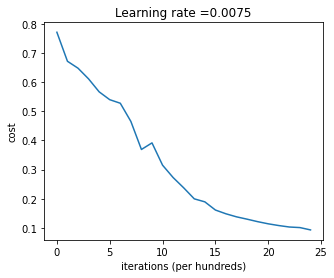

In [22]:
parameters=dnn_model(train_x,train_y,layers_dims,learning_rate=0.0075,iteration=2500,print_cost=True)

In [24]:
def predict(X,parameters):
    
    m = X.shape[1]
    y_pred=np.zeros((1,m))
    
    probs, caches = linear_model(X,parameters)
    
    for i in range(len(probs[0])):
        
        if probs[0][i] >= 0.5:
            y_pred[0][i]=1
        
        else:
            y_pred[0][i]=0
    
    return y_pred
    

In [25]:
def accuracy_score(y_pred,y_true):
    
    m=y_true.shape[1]
    acc=np.sum((y_pred==y_true)) / m
    
    print("Accuracy score:",acc)
    print("#True predicts",np.sum((y_pred==y_true)))

In [26]:
y_pred_train=predict(train_x,parameters)

In [27]:
accuracy_score(y_pred_train,train_y)

Accuracy score: 0.9856459330143541
#True predicts 206


In [28]:
y_pred_test=predict(test_x,parameters)
accuracy_score(y_pred_test,test_y)

Accuracy score: 0.8
#True predicts 40


In [29]:
def confusion_matrix(y_pred,y_true):
    
    true_p=np.sum((y_pred==y_true),where=(y_pred==1))
    true_n=np.sum((y_pred==y_true),where=(y_pred==0))
    false_p=np.sum((y_pred!=y_true),where=(y_pred==1))
    false_n=np.sum((y_pred!=y_true),where=(y_pred==0))
    
    matrix=np.array([true_n,false_p,false_n,true_p]).reshape(2,2)
    df=pd.DataFrame(matrix,index=[0,1],columns=[0,1])
    
    return df

In [30]:
matrix=confusion_matrix(y_pred_train,train_y)

In [31]:
matrix

,0,1
0,137,0
1,3,69


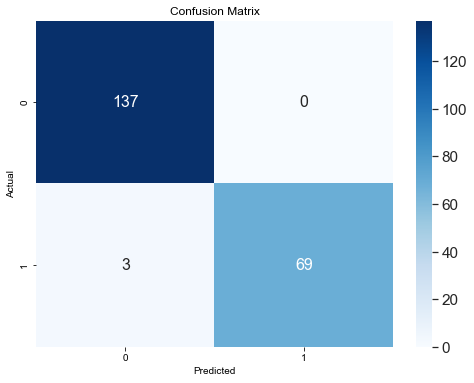

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(pred_y, true_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(pred_y, true_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return

plot_confusion_matrix(y_pred_train,train_y)

In [35]:
matrix=confusion_matrix(y_pred_test,test_y)

In [36]:
matrix

,0,1
0,10,7
1,3,30


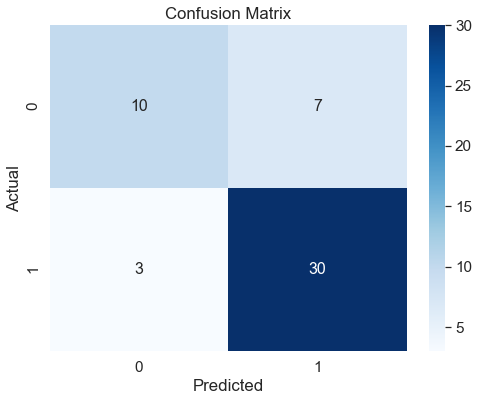

In [37]:
plot_confusion_matrix(y_pred_test,test_y)